## HYPOTHESIS BUILDING

#### 1. Has the network latency gone up since we switched internet service providers?

In [1]:
# Ho = Network latency is not longer than before with the new internet service provider.
# Hα = Network latency is longer than before with the new internet service provider.
# True Positive = Low p-value, narrow confidence interval, drop in average latency with new internet service provider than with the previous internet service provider.
# True Negative = There is no difference in the average latencies with or without the new internet service provider. OR, the average latency is less with the new one
# Type I Error = There are other factors causing *temporary* slower internet (weather)
# Type II Error = There are other services slowing down the internet service (large apps running in background)

#### 2. Is the website design any good?

In [2]:
# Ho = Customers are not making more purchases with the new website design.
# Hα = Customers are making more purchases with the new website design.
# True Positive = Low p-value, narrow confidence interval, same rate of new customers and churn, increased rate of purchases being made
# True Negative = same rate of new customers and churn, rate of purchases is unchanged or lowers
# Type I Error = reject null but true, redesign launched for new company, increase in sales was only increase in general popularity
# Type II Error = accept null but false, redesign launched during pandemic, steady or decrease in sales due to market crashing

#### 3. Is our television ad driving more sales?

In [3]:
# Ho = Customers are making more purchases because of our television ad 
# Hα = Customers are not making more purchases becasue of our television ad
# True Positive = Low p-value, narrow confidence interval, customers are completing survey during checkout that they heard about our products via tv ad 
# True Negative = customers are completeing survey during checkout that they heard about our products via any other method
# Type I Error = reject null but true, increase in feedback about the tv ad due to top (fastest) option in checkout survey
# Type II Error = accept null but false, people are watching regular tv less and less, might not reach target audience

## T-TEST

In [4]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

#### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [5]:
# Ho = There is no difference between the offices for the average time it takes to sell homes
# Ha = There is a difference between the offices for the average time it takes to sell homes

# 2 sample, 2 tail

In [6]:
cust1 = 40
μ1 = 90
σ1 = 15
cust2 = 50
μ2 = 100
σ2 = 20
α = .05

sales1 = stats.norm(μ1, σ1)
sales2 = stats.norm(μ2, σ2)

In [7]:
bus1 = sales1.rvs(cust1)
bus2 = sales2.rvs(cust2)

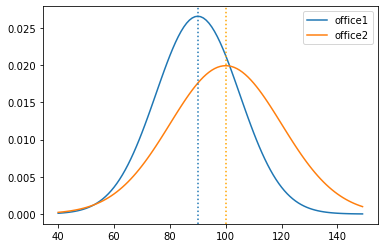

In [8]:
# another way to plot
x = np.arange(40,150)
y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)
plt.plot(x,y1, label='office1')
plt.plot(x,y2, label='office2')
plt.axvline(90, ls=':')
plt.axvline(100, ls=':', color='orange')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Count'>

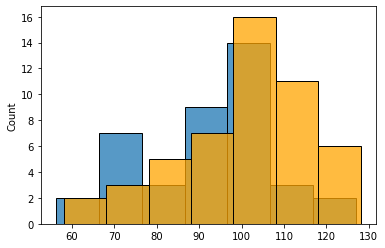

In [9]:
sns.histplot(bus1)
sns.histplot(bus2, color='orange')

In [10]:
bus1.mean(), bus2.mean()

(92.1826966193059, 100.80534788157131)

In [11]:
# check variance
s, p = stats.levene(bus1, bus2)

In [12]:
# variance not similar
p < α

False

In [13]:
t, p = stats.ttest_ind(bus1, bus2, equal_var=False)

In [14]:
p < α

True

In [15]:
# reject null hypothesis
# the average time it takes to sell the homes between the two offices is significantly different

In [16]:
## ANOTHER WAY
t, p = stats.ttest_ind_from_stats(μ1, σ1, cust1, μ2, σ2, cust2, equal_var=False)

In [17]:
p < α

True

#### 2. Load the mpg dataset and use it to answer the following questions:

In [18]:
mpg = pd.DataFrame(data('mpg'))
mpg['fuel_eff'] = 2/(1/mpg.cty + 1/mpg.hwy)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


##### 2.a Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [19]:
# Ho = There is not a difference in fuel efficiency between 2008 and 1999 cars
# Ha = There is a difference in fuel efficiency between 2008 and 1999 cars

# 2 samples, 2 tails

In [20]:
eight = mpg[mpg.year == 2008].fuel_eff
nine = mpg[mpg.year == 1999].fuel_eff

<AxesSubplot:xlabel='fuel_eff', ylabel='Count'>

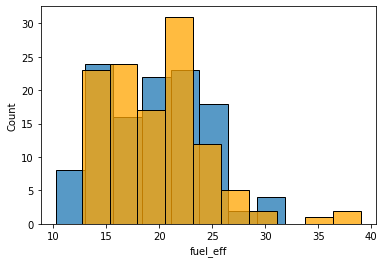

In [21]:
sns.histplot(eight)
sns.histplot(nine, color = 'orange')

In [22]:
[eight.mean(), eight.shape], [nine.mean(), nine.shape]

([19.488662986569054, (117,)], [19.68238764869729, (117,)])

In [23]:
α = 0.05

In [24]:
# check for variance
s, p = stats.levene(eight, nine)

In [25]:
# variance is similar
p < α

False

In [26]:
t, p = stats.ttest_ind(eight, nine)
p

0.7635345888327115

In [27]:
p < α

False

In [28]:
# there is not a difference in fuel efficiency between 2008 and 1999 vehicles
# accept null hypothesis

##### 2.b Are compact cars more fuel-efficient than the average car?

In [29]:
#Ho = Compact cars' fuel efficiency is <= the average car's fuel efficiency
#Ha = Compact cars' fuel efficiency is > the average car's fuel efficiency

# 1 sample, 1 tail

In [30]:
compact = mpg[mpg['class'] == 'compact'].fuel_eff
μth = mpg.fuel_eff.mean()

In [31]:
t, p = stats.ttest_1samp(compact, μth)

In [32]:
p/2 < α, t > 0

(True, True)

In [33]:
# reject null hypothesis

##### 2.c Do manual cars get better gas mileage than automatic cars?

In [34]:
# Ho = Manual cars' gas mileage is <= automatic cars' gas mileage
# Ha = Manual cars' gas mileage is > automatic cars' gas mileage

# 2 sample, 1 tail

In [35]:
manual = mpg[mpg['trans'].str.contains('manual')].fuel_eff
auto = mpg[mpg['trans'].str.contains('auto')].fuel_eff

In [36]:
#check variance
s, p = stats.levene(manual, auto)

In [37]:
# variance not similar
p < α

False

In [38]:
t, p = stats.ttest_ind(manual, auto, equal_var=False)

In [39]:
p/2 < α, t > 0

(True, True)

In [40]:
# reject the null hypothesis

## CORRELATION

In [41]:
from math import sqrt
α = 0.05

### 1. Use the telco_churn data.

In [42]:
telco = pd.read_csv('telco_churn - telco_churn.csv')
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
telco2 = telco[telco.TotalCharges > 0]
telco2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### 1.a Does tenure correlate with monthly charges?

In [44]:
# Ho = There is not a linear relationship between tenure and monthly charges
# Ha = There is a linear relationship between tenure and monthly charges

In [45]:
x = telco2.tenure
y = telco2.MonthlyCharges

In [46]:
r, p = stats.pearsonr(x,y)
r,p

(0.24686176664089593, 3.989821323249241e-98)

In [47]:
p < α

True

In [48]:
# Reject Ho

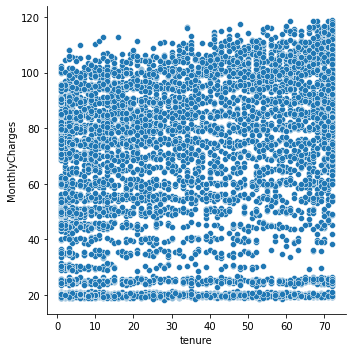

In [49]:
sns.relplot(data=telco2, x='tenure', y='MonthlyCharges')
plt.show()

#### 1.b Total charges? 

In [50]:
# Ho = There is not a linear relationship between tenure and total charges
# Ha = There is a linear relationship between tenure and total charges

In [51]:
x = telco2.tenure
y = telco2.TotalCharges

In [52]:
r, p = stats.pearsonr(x,y)
r,p

(0.8258804609332093, 0.0)

In [53]:
p < α

True

In [54]:
# Reject Ho

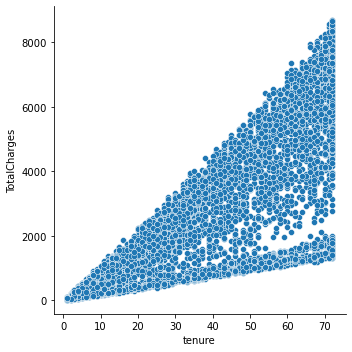

In [55]:
sns.relplot(data=telco2, x='tenure', y='TotalCharges')
plt.show()

#### 1.c What happens if you control for phone and internet service?

In [57]:
# Control for phone service
# Ho = There is not a linear relationship between tenure and total charges when controlling for phone service
# Ha = There is a linear relationship between tenure and total charges when controlling for phone service

In [60]:
phone = telco2[telco2.PhoneService == 'Yes']
no_phone = telco2[telco2.PhoneService == 'No']

In [61]:
r, p = stats.pearsonr(phone.tenure, phone.TotalCharges)
r, p

(0.8298393210699484, 0.0)

In [62]:
p < α

True

In [63]:
r, p = stats.pearsonr(no_phone.tenure, no_phone.TotalCharges)
r, p

(0.953422850695451, 0.0)

In [64]:
p < α

True

In [65]:
# Reject Ho

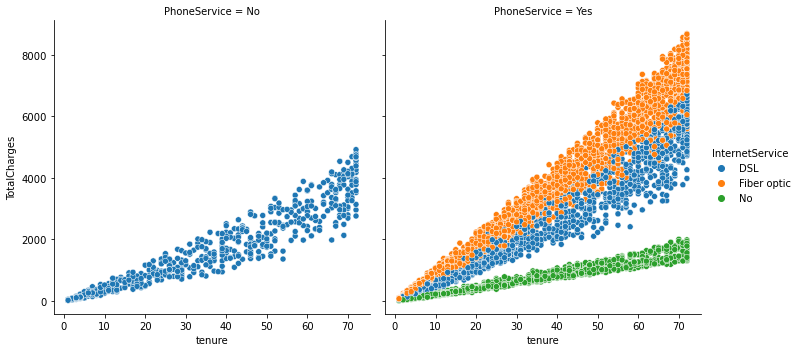

In [66]:
sns.relplot(data=telco2, x='tenure', y='TotalCharges', hue='InternetService', col='PhoneService')
plt.show()

In [67]:
# Control for Internet Service
# Ho = There is not a linear relationship between tenure and total charges when controlling for internet service
# Ha = There is a linear relationship between tenure and total charges when controlling for internet service

In [68]:
telco2.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [69]:
internet = telco2[telco2.InternetService != 'No']
no_internet = telco2[telco2.InternetService == 'No']

In [70]:
r,p = stats.pearsonr(internet.tenure, internet.TotalCharges)
r,p

(0.931934618741812, 0.0)

In [71]:
p < α

True

In [72]:
r,p = stats.pearsonr(no_internet.tenure, no_internet.TotalCharges)
r,p

(0.9814648859044293, 0.0)

In [73]:
p < α

True

In [74]:
# Reject Ho

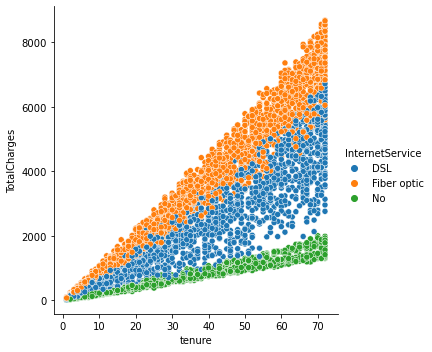

In [75]:
sns.relplot(data=telco2, x='tenure', y='TotalCharges', hue='InternetService')
plt.show()

In [77]:
# ANOTHER WAY
telco2.groupby(['InternetService', 'PhoneService']).count()

customerID  gender  SeniorCitizen  Partner  \
InternetService PhoneService                                               
DSL             No                   680     680            680      680   
                Yes                 1736    1736           1736     1736   
Fiber optic     Yes                 3096    3096           3096     3096   
No              Yes                 1520    1520           1520     1520   

                              Dependents  tenure  MultipleLines  \
InternetService PhoneService                                      
DSL             No                   680     680            680   
                Yes                 1736    1736           1736   
Fiber optic     Yes                 3096    3096           3096   
No              Yes                 1520    1520           1520   

                              OnlineSecurity  OnlineBackup  DeviceProtection  \
InternetService PhoneService                                                   
DSL             No                       680           680               680   
                Yes                     1736          1736              1736   
Fiber optic     Yes                     3096          3096              3096   
No              Yes                     1520          1520              1520   

                              TechSupport  StreamingTV  StreamingMovies  \
InternetService PhoneService                                              
DSL             No                    680          680              680   
                Yes                  1736         1736             1736   
Fiber optic     Yes                  3096         3096             3096   
No              Yes                  1520         1520             1520   

                              Contract  PaperlessBilling  PaymentMethod  \
InternetService PhoneService                                              
DSL             No                 680               680            680   
                Yes               1736              1736           1736   
Fiber optic     Yes               3096              3096           3096   
No              Yes               1520              1520           1520   

                              MonthlyCharges  TotalCharges  Churn  
InternetService PhoneService                                       
DSL             No                       680           680    680  
                Yes                     1736          1736   1736  
Fiber optic     Yes                     3096          3096   3096  
No              Yes                     1520          1520   1520

In [82]:
def corr_fun(df):
    return pd.Series(stats.pearsonr(df.tenure, df.TotalCharges), index=['r','p'])

In [84]:
telco2.groupby(['PhoneService', 'InternetService']).apply(corr_fun)

r    p
PhoneService InternetService               
No           DSL              0.953423  0.0
Yes          DSL              0.970533  0.0
             Fiber optic      0.985309  0.0
             No               0.981465  0.0

In [85]:
# Reject Ho for all cases

### 2. Use the employees database.

In [89]:
import env
user = env.user
password = env.password
host = env.host
schema = 'employees'

In [90]:
query = '''
        SELECT * FROM 
        employees
        JOIN salaries USING (emp_no)
        WHERE to_date > CURDATE();
'''

In [93]:
conn = f'mysql+pymysql://{user}:{password}@{host}/{schema}'
sals = pd.read_sql(query, conn)

In [94]:
sals.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


#### 2.a Is there a relationship between how long an employee has been with the company and their salary?

In [180]:
# Ho = There is not a linear relationship between hire date and salary
# Ha = There is a linear relationship between hire date and salary

In [102]:
sals['tenure'] = (sals.to_date - sals.hire_date).astype('str').str.split(' ', expand=True)[0].astype(int)

In [103]:
x = sals.tenure
y = sals.salary
r,p = stats.pearsonr(x,y)
r,p

(0.30646256131860095, 0.0)

In [104]:
p < α

True

In [105]:
# Reject Ho

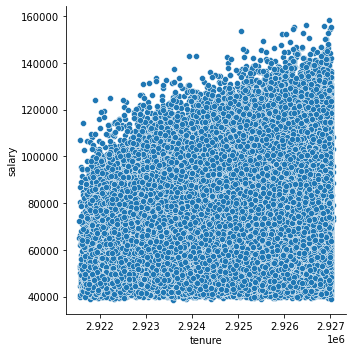

In [106]:
sns.relplot(data=sals, x='tenure', y='salary')
plt.show()

#### 2.b Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [107]:
# Ho = There is not a linear relationship between hire date and number of titles
# Ha = There is a linear relationship between hire date and number of titles

In [113]:
titles = pd.read_csv('titles.csv')
titles.hire_date = titles.hire_date.str.slice(0,4).astype('int')
titles = titles.rename(columns={'count(title)': 'title_count'})
titles.head()

,emp_no,title_count,hire_date
0,10001,1,1986
1,10002,1,1985
2,10003,1,1986
3,10004,2,1986
4,10005,2,1989


In [114]:
x = titles.hire_date
y = titles.title_count
r,p = stats.pearsonr(x,y)
r,p

(-0.28635198982906035, 0.0)

In [115]:
p < α

True

In [116]:
# Reject Ho

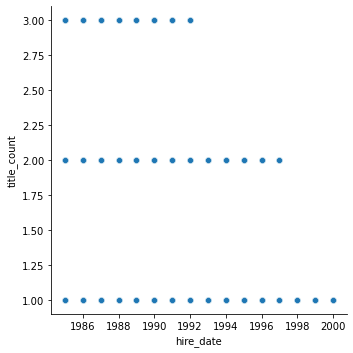

In [117]:
sns.relplot(data=titles, x='hire_date', y='title_count')
plt.show()

In [118]:
# There is moderate negative correlation between count of titles and the year hired(inverse of how long theyve been with the company)

### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [119]:
# Ho = There is not a linear relationship between days and reaction time
# Ha = There is a linear relationship between days and reaction time

In [120]:
ss = data('sleepstudy')
ss.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [121]:
x = ss.Days
y = ss.Reaction
r,p = stats.pearsonr(x,y)
r,p

(0.5352302262650255, 9.89409632221439e-15)

In [122]:
p < α

True

In [123]:
# Reject Ho

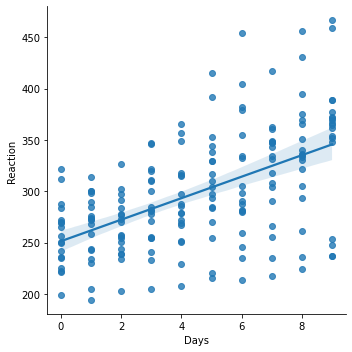

In [124]:
sns.lmplot(data=ss, x='Days', y='Reaction')
plt.show()

## CHI SQUARE

### 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [144]:
# Ho: There is no association between being a codeup student and using a macbook
# Ha: There is an association between being a codeup student and using a macbook

In [145]:
table = pd.DataFrame([[49, 20], [1, 30]])
table.columns = ['Codeup Student','Not Codeup Student']
table.index = ['Uses a Macbook','Does not use a Macbook']
table

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Does not use a Macbook,1,30


In [146]:
chi2, pval, degf, expected = stats.chi2_contingency(table)
chi2, pval, degf, expected

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

In [147]:
pval < α

True

In [148]:
# Reject Ho

### 2. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [155]:
# Ho: There is no association between year and cylinders
# Ha: There is an association between year and cylinders

In [149]:
mpg = data('mpg')

In [151]:
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [152]:
mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [153]:
mpg.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

In [154]:
o = pd.crosstab(mpg.year, mpg.cyl)
o

cyl,4,5,6,8
year,,,,
1999,45,0,45,27
2008,36,4,34,43


In [156]:
chi2, pval, degf, expected = stats.chi2_contingency(o)
chi2, pval, degf, expected

(10.18878842676311,
 0.01702768537665195,
 3,
 array([[40.5,  2. , 39.5, 35. ],
        [40.5,  2. , 39.5, 35. ]]))

In [157]:
pval < α

True

In [158]:
# Reject Ho

### 3. Use the data from the employees database to answer these questions:

In [168]:
query = '''
        SELECT * FROM employees
        JOIN dept_emp USING (emp_no)
        JOIN departments USING (dept_no)
        WHERE to_date > CURDATE();
'''

In [169]:
schema = 'employees'
conn = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{schema}'
df = pd.read_sql(query, conn)

In [170]:
df.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,1989-09-20,9999-01-01,Customer Service
1,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,1992-05-04,9999-01-01,Customer Service
2,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,1992-11-11,9999-01-01,Customer Service
3,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,1992-03-21,9999-01-01,Customer Service
4,d009,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,1998-05-01,9999-01-01,Customer Service


In [171]:
df.nunique()

dept_no            9
emp_no        240124
birth_date      4750
first_name      1275
last_name       1637
gender             2
hire_date       5425
from_date       6393
to_date            1
dept_name          9
dtype: int64

#### 3.a Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [175]:
# Ho: There is no association between gender and working in sales or marketing
# Ha: There is an association between gender and working in sales or marketing

In [172]:
df2 = df[(df.dept_name == 'Sales') | (df.dept_name == 'Marketing')]

In [173]:
o = pd.crosstab(df2.gender, df2.dept_name)
o

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [174]:
chi2, pval, degf, expected = stats.chi2_contingency(o)
chi2, pval, degf, expected

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013, 14969.7573987],
        [ 8948.7573987, 22731.2426013]]))

In [176]:
pval < α

False

In [177]:
# Fail to reject Ho

#### 3.b Is an employee's gender independent of whether or not they are or have been a manager?

In [178]:
# Ho: There is no association between gender and having been a manager
# Ha: There is an association between gender and having been a manager

In [181]:
query = '''
        SELECT employees.emp_no, 
        gender,
        IF (employees.emp_no in (SELECT emp_no FROM dept_manager), True, False) AS is_manager
        FROM employees
        LEFT JOIN dept_emp USING (emp_no)
        LEFT JOIN dept_manager USING (emp_no)
        WHERE dept_emp.to_date > CURDATE();
'''

In [182]:
schema = 'employees'
conn = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{schema}'
df = pd.read_sql(query, conn)

In [183]:
df.head()

,emp_no,gender,is_manager
0,10001,M,0
1,10002,F,0
2,10003,M,0
3,10004,M,0
4,10005,M,0


In [192]:
o = pd.crosstab(df.gender, df.is_manager)
o

is_manager,0,1
gender,,
F,95997,13
M,144103,11


In [195]:
chi2, pval, degf, expected = stats.chi2_contingency(o)
print('Observed\n')
print(o.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'pval  = {pval:.4f}')
print(f'degf  = {degf:.4f}')

Observed

[[ 95997     13]
 [144103     11]]
---
Expected

[[9.60004040e+04 9.59604204e+00]
 [1.44099596e+05 1.44039580e+01]]
---

chi^2 = 1.4644
pval  = 0.2262
degf  = 1.0000


In [196]:
pval < α

False

In [197]:
# Fail to reject Ho